In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from constants_functions import *

In [ ]:
sstt = 1e-2 
theta0 = 0.5 * np.arcsin(np.sqrt(sstt))
dm2 = 1e-3
xi = 1e-2
init_LA = 1/(12*Apery) * (np.pi ** 2 * xi + xi ** 3)

T_start=4e7
T_end=4e5

file_name = "/home/projects/sterilenuosc/results/archive/precession_5.01e-02_1.00e-03_LA6.84e-03.txt"
stacked = np.loadtxt(file_name)

# file_name1 = f"/home/projects/sterilenuosc/results/alt_precession_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_LA{'{:.2e}'.format(init_LA)}_T{'{:.2e}'.format(T_start)}-{'{:.2e}'.format(T_end)}.txt"
# file_name2 = "/home/projects/sterilenuosc/results/alt_precession_5.01e-02_1.00e-03_LA6.84e-03_T4.00e+05-3.50e+05.txt"
# stacked1 = np.loadtxt(file_name1)
# stacked2 = np.loadtxt(file_name2)
# stacked = np.concatenate([stacked1.T, stacked2.T]).T

nbins = (len(stacked)-3) // 8
y_arr = np.linspace(0.1, 25, nbins)
f0 = f_0(y_arr, 0)

In [ ]:
print(stacked.shape)

(163, 100000)


In [ ]:
def H(x, P0_arr, P0bar_arr, z):
    rho = (2 * rho_e(x, z) + rho_nu(y_arr, P0_arr, P0bar_arr) + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)

# y is replaced by 1! be sure to multiply back at the end

def l(x, z, H_x): # nondimensionalize 
    const = 2 * np.sqrt(2) * G_F / (x * H_x) * 1 * (m_e / x) ** 5 / (m_W ** 2)
    var = 2 * (rho_e(x, z) + P_e(x, z))
    return np.array([0, 0, -var * const])

def b(x, H_x): # constant (vacuum term)
    theta = theta0
    const = dm2 / (x * H_x) * (x / m_e) / (2 * 1)
    return const * np.array([np.sin(2*theta), 0, -np.cos(2*theta)])

def v_L(x, LA, H_x):
    return np.array([0, 0, 2 * np.sqrt(2) * Apery / np.pi ** 2 * G_F * (m_e / x) ** 3 * LA / (x * H_x)])

def Gamma_e(x, z):
    return C_e * G_F ** 2 * 1 * (m_e/x) ** 5 * z ** 5

In [ ]:
xs = stacked[0,:]
zs = stacked[-1,:]
LAs = stacked[-2, :]
P0s = stacked[1:-2:8,:]
P0bars = stacked[5:-2:8,:]

y = 3.15

hubs = []
Bs = []
Ls = []
vLs = []
for i in range(len(xs)):
    x = xs[i]
    z = zs[i]
    P0 = P0s[:,i]
    P0bar = P0bars[:,i]
    hub = H(x, P0, P0bar, z)
    hubs.append(hub)
    Bs.append(np.linalg.norm(b(x, hub)/y))
    Ls.append(np.linalg.norm(l(x, z, hub)*y))
    vLs.append(v_L(x, LAs[i], hub))
hubs = np.array(hubs)
Bs = np.array(Bs)
Ls = np.array(Ls)
vLs = np.array(vLs)

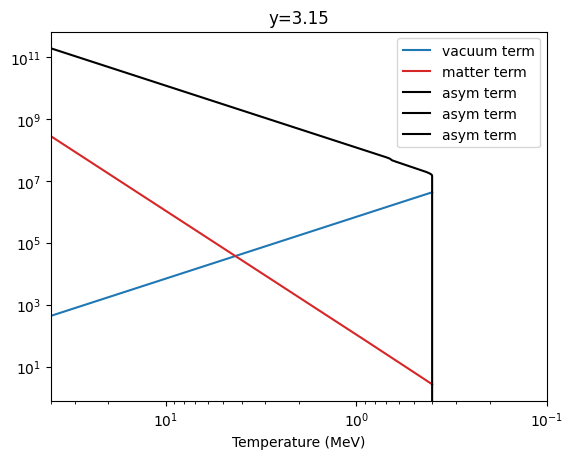

In [ ]:
plt.xlim([4e1, 1e-1])
# plt.ylim([-1e3, 1e3])
# plt.semilogx(1e-6*m_e/xs, hubs)
plt.loglog(1e-6*m_e/xs, Bs, color='tab:blue', label='vacuum term')
plt.loglog(1e-6*m_e/xs, Ls, color='tab:red', label='matter term')
plt.semilogx(1e-6*m_e/xs, vLs, color='k', label='asym term')
plt.xlabel("Temperature (MeV)")
plt.title("y=3.15")
plt.legend()
plt.show()

In [ ]:
dLAs = np.loadtxt(f"/home/projects/sterilenuosc/results/alt_dLAs_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_LA{'{:.2e}'.format(init_LA)}.txt")
print(dLAs.shape)

(253192, 2)


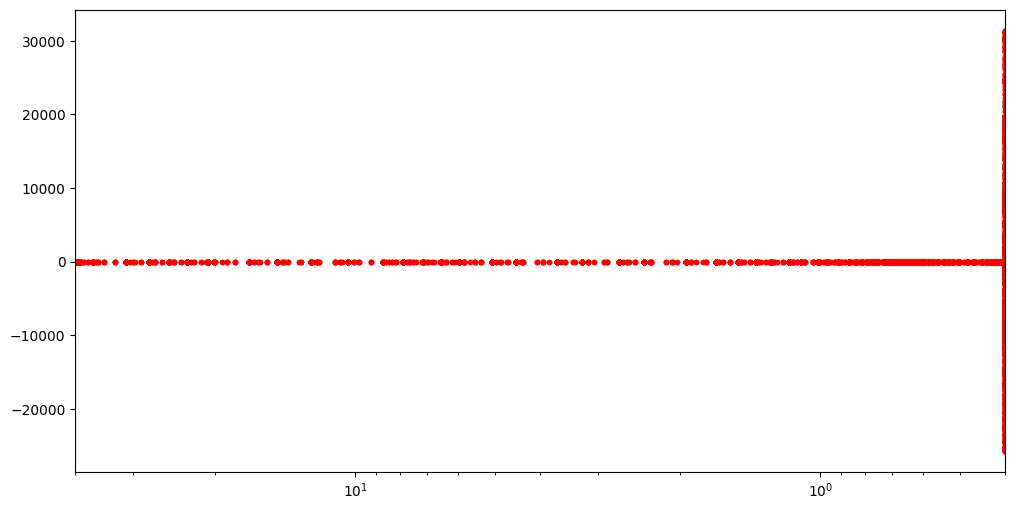

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlim([4e1, 4e-1])
# plt.ylim([-1e9, 1e9])

plt.semilogx(1e-6*m_e/dLAs[:,0], dLAs[:,1], color='r', marker='.', lw=0)

In [ ]:
xs = stacked[0,:]
zs = stacked[-1,:]
Pys = stacked[3:-2:8,:]
Pybars = stacked[7:-2:8,:]

dLAs = []
for i in range(len(xs)):
    x = xs[i]
    z = zs[i]
    Py = Pys[:,i]
    Pybar = Pybars[:,i]
    H_x = H(x, P0, P0bar, z)
    B=b(x, hub)
    integrand = B[0]/y_arr * y_arr ** 2 * f0 * (Py - Pybar)
    dLA = 1 / (x * H_x) / (8 * Apery) * inte(y_arr, integrand)
    dLAs.append(dLA)
dLAs = np.array(dLAs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


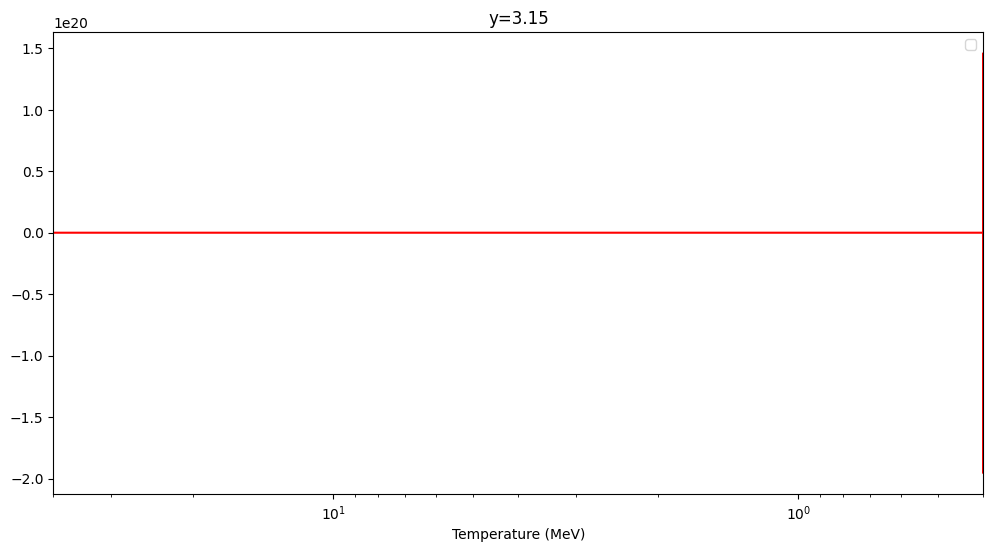

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlim([4e1, 4e-1])
# plt.ylim([-1e3, 1e3])
plt.semilogx(1e-6*m_e/xs, dLAs, color='r')
plt.xlabel("Temperature (MeV)")
plt.title("y=3.15")
plt.legend()
plt.show()

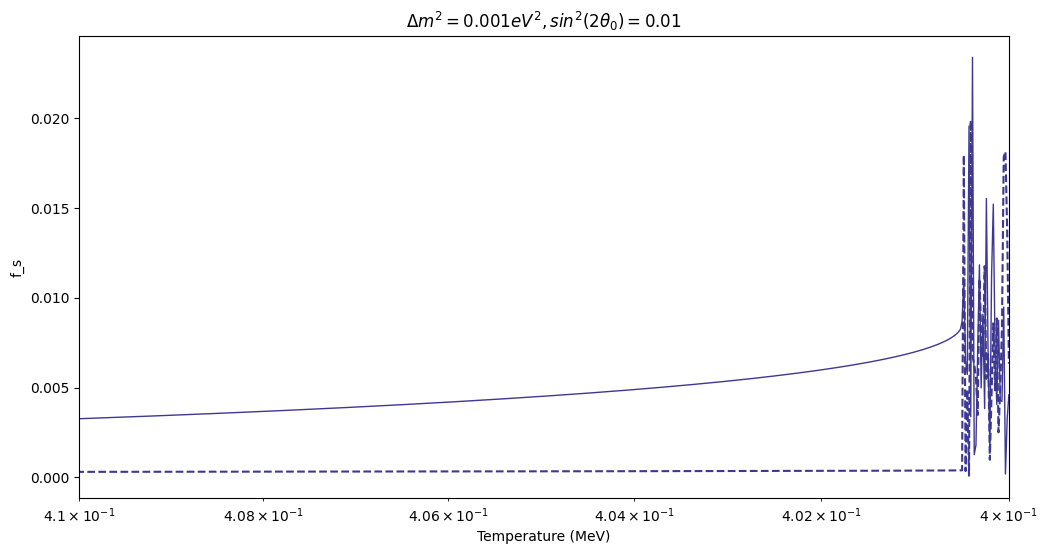

In [ ]:
nbins = (len(stacked)-3) // 8
y_arr = np.linspace(0.1, 25, nbins)
f0 = f_0(y_arr, 0)

xs = stacked[0,:]
zs = stacked[-1,:]
LAs = stacked[-2, :]

plt.figure(figsize=(12, 6))

cmap = mpl.colormaps['turbo'] #[clr(i/n_temps) for i in range(n_temps)]
colors = cmap(np.linspace(0, 1, nbins))

for i in [1]:
    P0s = stacked[8*i+1,:]
    Pxs = stacked[8*i+2,:]
    Pys = stacked[8*i+3,:]
    Pzs = stacked[8*i+4,:]
    P0bars = stacked[8*i+5,:]
    Pxbars = stacked[8*i+6,:]
    Pybars = stacked[8*i+7,:]
    Pzbars = stacked[8*i+8,:]

    plt.xlim(4.1e-1, 4.00e-1)
    # plt.ylim(-1e-6, 1e-6)
    # plt.semilogx(1e-6*m_e/xs, zs, color='tab:blue', linewidth=2)
    # plt.semilogx(1e-6*m_e/xs, (Pys-Pybars)/2, label=y_arr[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, Pxbars, label=y_arr[i], color=colors[i],lw=1)
    plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, label=y_arr[i], color=colors[i],lw=1)
    plt.semilogx(1e-6*m_e/xs, (P0bars-Pzbars)/2, label=y_arr[i], color=colors[i],lw=1.5,linestyle='dashed')
    # plt.semilogx(1e-6*m_e/xs, (P0s-P0bars+Pzs-Pzbars)/2, label=y_arr[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, LAs, color='b', lw=1, linestyle='dashed')
# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(r"$\Delta m^2 = 0.001 eV^2, sin^2(2\theta_0)=0.01$")
plt.show()

In [ ]:
print(1e-6 * m_e/xs[-1])

0.40000000009210335


In [ ]:
P0s = stacked[1:-2:8,-1]
Pxs = stacked[2:-2:8,-1]
Pys = stacked[3:-2:8,-1]
Pzs = stacked[4:-2:8,-1]
P0bars = stacked[5:-2:8,-1]
Pxbars = stacked[6:-2:8,-1]
Pybars = stacked[7:-2:8,-1]
Pzbars = stacked[8:-2:8,-1]

integrand = y_arr ** 2 * f0 * (P0s-P0bars+Pzs-Pzbars)
print(1/(8*Apery)* inte(y_arr, integrand))

##########

In [ ]:
sstt = 1e-2 
theta0 = 0.5 * np.arcsin(np.sqrt(sstt))
dm2 = 1e-3
xi = 1e-4
init_LA = 1/(12*Apery) * (np.pi ** 2 * xi + xi ** 3)

file_name = f"/home/projects/sterilenuosc/results/alt_precession_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_LA{'{:.2e}'.format(init_LA)}.txt"
stacked = np.loadtxt(file_name)

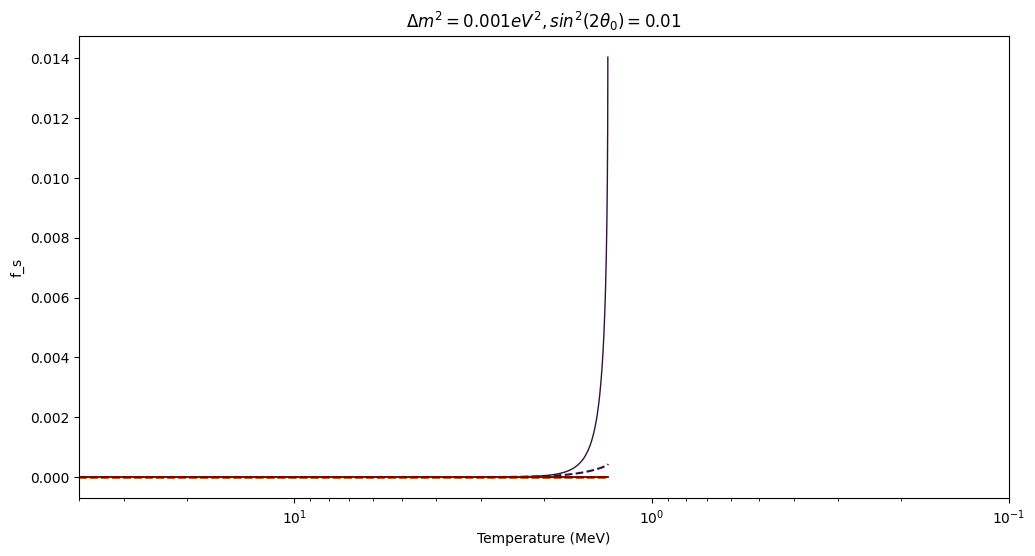

In [ ]:
xs = stacked[0,:]
zs = stacked[-1,:]
LAs = stacked[-2, :]

plt.figure(figsize=(12, 6))

cmap = mpl.colormaps['turbo'] #[clr(i/n_temps) for i in range(n_temps)]
colors = cmap(np.linspace(0, 1, nbins))

for i in range(nbins):
    P0s = stacked[8*i+1,:]
    Pxs = stacked[8*i+2,:]
    Pys = stacked[8*i+3,:]
    Pzs = stacked[8*i+4,:]
    P0bars = stacked[8*i+5,:]
    Pxbars = stacked[8*i+6,:]
    Pybars = stacked[8*i+7,:]
    Pzbars = stacked[8*i+8,:]

    plt.xlim(4e1, 1e-1)
    # plt.ylim(-1e-6, 1e-6)
    # plt.semilogx(1e-6*m_e/xs, zs, color='tab:blue', linewidth=2)
    # plt.semilogx(1e-6*m_e/xs, (Pys-Pybars)/2, label=y_arr[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, Pxbars, label=y_arr[i], color=colors[i],lw=1)
    plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, label=y_arr[i], color=colors[i],lw=1)
    plt.semilogx(1e-6*m_e/xs, (P0bars-Pzbars)/2, label=y_arr[i], color=colors[i],lw=1.5,linestyle='dashed')
    # plt.semilogx(1e-6*m_e/xs, (P0s-P0bars+Pzs-Pzbars)/2, label=y_arr[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, LAs, color='b', lw=1, linestyle='dashed')
# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(r"$\Delta m^2 = 0.001 eV^2, sin^2(2\theta_0)=0.01$")
plt.show()

###########################

In [ ]:
sstt = 1e-2 
theta0 = 0.5 * np.arcsin(np.sqrt(sstt))
dm2 = 1e-3
xi = 1e-2
init_LA = 1/(12*Apery) * (np.pi ** 2 * xi + xi ** 3)

T_start=4e7
T_end=4e5

file_name = "/home/projects/sterilenuosc/results/precession+dw_5.01e-02_1.00e-03_LA6.84e-03_T4.00e+07-1.00e+05.txt"
stacked = np.loadtxt(file_name)

# file_name1 = f"/home/projects/sterilenuosc/results/archive/alt_precession_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_LA{'{:.2e}'.format(init_LA)}_T{'{:.2e}'.format(T_start)}-{'{:.2e}'.format(T_end)}.txt"
# file_name2 = "/home/projects/sterilenuosc/results/archive/alt_precession_5.01e-02_1.00e-03_LA6.84e-03_T4.00e+05-3.50e+05.txt"
# stacked1 = np.loadtxt(file_name1)
# stacked2 = np.loadtxt(file_name2)
# stacked = np.concatenate([stacked1.T, stacked2.T]).T

nbins = (len(stacked)-3) // 4
y_arr = np.linspace(0.1, 25, nbins)
f0 = f_0(y_arr, 0)

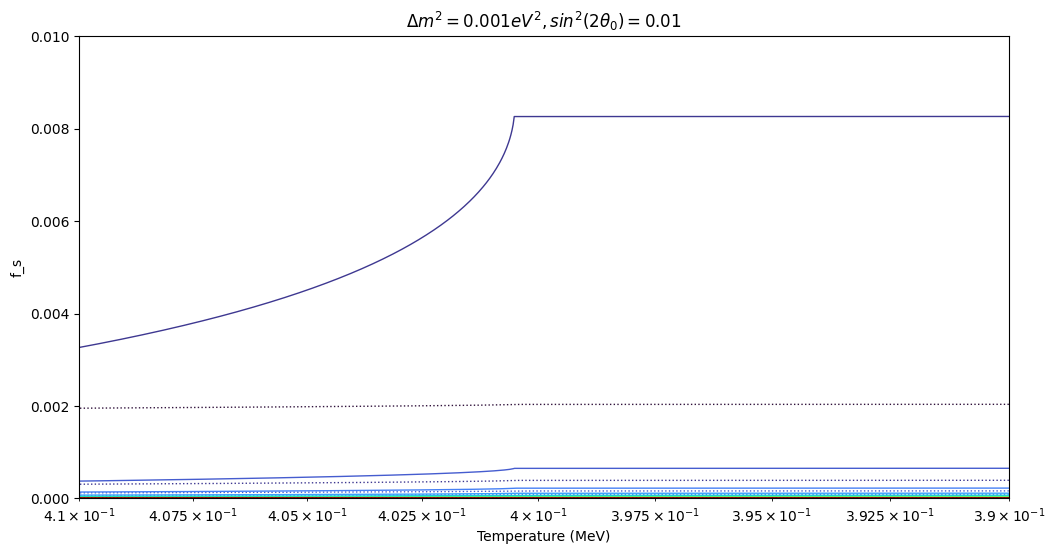

In [ ]:
xs = stacked[0,:]
zs = stacked[-1,:]
LAs = stacked[-2,:]

plt.figure(figsize=(12, 6))

cmap = mpl.colormaps['turbo'] #[clr(i/n_temps) for i in range(n_temps)]
colors = cmap(np.linspace(0, 1, nbins))

for i in range(nbins):
    fs = stacked[i+1,:]
    fsbar = stacked[i+nbins+1,:]
    fa = stacked[i+2*nbins+1,:]
    fabar = stacked[i+3*nbins+1,:]

    plt.xlim(4.1e-1, 3.9e-1)
    plt.ylim(0,0.01)
    plt.semilogx(1e-6*m_e/xs, fs, color=colors[i], lw=1)
    plt.semilogx(1e-6*m_e/xs, fsbar, color=colors[i], lw=1, linestyle='dotted')
    # plt.semilogx(1e-6*m_e/xs, fa, color=colors[i], lw=1)
    # plt.semilogx(1e-6*m_e/xs, fabar, color=colors[i], lw=1, linestyle='dotted')
    # plt.semilogx(1e-6*m_e/xs, LAs, color='b', lw=1, linestyle='dashed')
# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(r"$\Delta m^2 = 0.001 eV^2, sin^2(2\theta_0)=0.01$")
plt.show()

In [ ]:
sstt = 1e-2 
theta0 = 0.5 * np.arcsin(np.sqrt(sstt))
dm2 = 1e-3
xi = 1e-2
init_LA = 1/(12*Apery) * (np.pi ** 2 * xi + xi ** 3)

T_start=4e7
T_end=4e5

file_name1 = f"/home/projects/sterilenuosc/results/archive/alt_precession_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_LA{'{:.2e}'.format(init_LA)}_T{'{:.2e}'.format(T_start)}-{'{:.2e}'.format(T_end)}.txt"
file_name2 = "/home/projects/sterilenuosc/results/archive/alt_precession_5.01e-02_1.00e-03_LA6.84e-03_T4.00e+05-3.50e+05.txt"
stacked1 = np.loadtxt(file_name1)
stacked2 = np.loadtxt(file_name2)
stacked = np.concatenate([stacked1.T, stacked2.T]).T

nbins = (len(stacked)-3) // 8
y_arr = np.linspace(0.1, 25, nbins)
f0 = f_0(y_arr, 0)

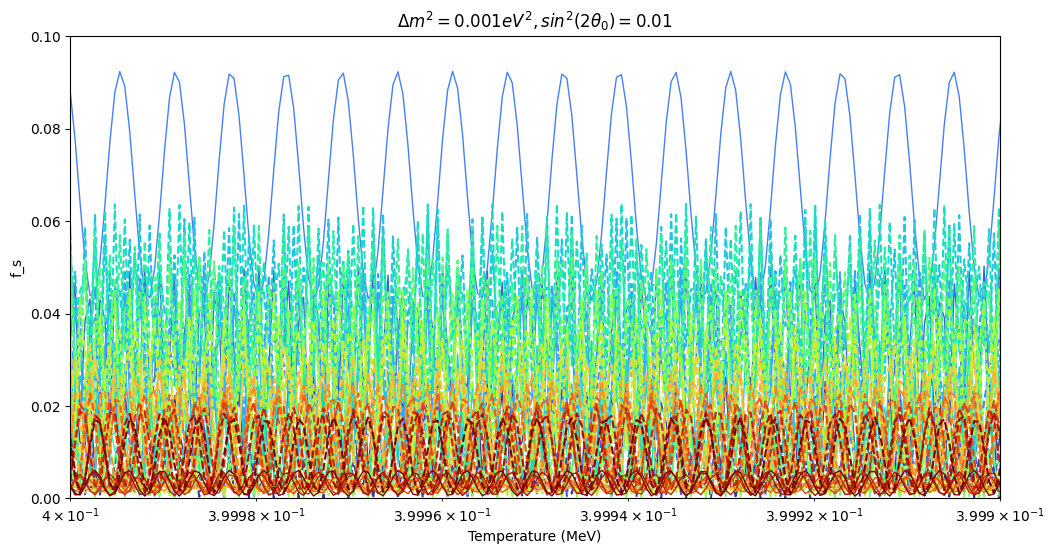

In [ ]:
xs = stacked[0,:]
zs = stacked[-1,:]
LAs = stacked[-2, :]

plt.figure(figsize=(12, 6))

cmap = mpl.colormaps['turbo'] #[clr(i/n_temps) for i in range(n_temps)]
colors = cmap(np.linspace(0, 1, nbins))

for i in range(nbins):
    P0s = stacked[8*i+1,:]
    Pxs = stacked[8*i+2,:]
    Pys = stacked[8*i+3,:]
    Pzs = stacked[8*i+4,:]
    P0bars = stacked[8*i+5,:]
    Pxbars = stacked[8*i+6,:]
    Pybars = stacked[8*i+7,:]
    Pzbars = stacked[8*i+8,:]

    plt.xlim(4.0e-1, 3.999e-1)
    plt.ylim(0, 0.1)
    # plt.semilogx(1e-6*m_e/xs, zs, color='tab:blue', linewidth=2)
    # plt.semilogx(1e-6*m_e/xs, (Pys-Pybars)/2, label=y_arr[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, Pxbars, label=y_arr[i], color=colors[i],lw=1)
    plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, label=y_arr[i], color=colors[i],lw=1)
    plt.semilogx(1e-6*m_e/xs, (P0bars-Pzbars)/2, label=y_arr[i], color=colors[i],lw=1.5,linestyle='dashed')
    # plt.semilogx(1e-6*m_e/xs, (P0s-P0bars+Pzs-Pzbars)/2, label=y_arr[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, LAs, color='b', lw=1, linestyle='dashed')
# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(r"$\Delta m^2 = 0.001 eV^2, sin^2(2\theta_0)=0.01$")
plt.show()

In [ ]:
# redefine Neff in terms of f from dw

def Neff(y_arr, f, f0):
    nbins = len(y_arr)
    fs, fsbar = f[:nbins], f[nbins:2*nbins]
    integrand = f0 * np.power(y_arr, 3) * (fs+fsbar) # check this!!
    n = f0 * np.power(y_arr, 3) * (np.ones_like(fs) * 2 - 1) #?? why did i do this instead of np.ones_like(fs)?
    return 1/inte(y_arr, n) * inte(y_arr, integrand)

ffinal = stacked[1:-2,-1]
Neff(y_arr, ffinal, f0)

0.0811163617986298

########

In [ ]:
file_name2 = "/home/projects/sterilenuosc/results/precession_binning0_5.01e-02_1.00e-03_stage1.00e+06.txt"
stacked2 = np.loadtxt(file_name2)

In [ ]:
xs = stacked2[0,:]
zs = stacked2[-1,:]

plt.figure(figsize=(12, 6))
plt.xlim([4e1, 1e0])

cmap = mpl.colormaps['turbo'] #[clr(i/n_temps) for i in range(n_temps)]
colors = cmap(np.linspace(0, 1, nbins))

for i in range(nbins):
    P0s = stacked[8*i+1,:]
    Pxs = stacked[8*i+2,:]
    Pys = stacked[8*i+3,:]
    Pzs = stacked[8*i+4,:]
    P0bars = stacked[8*i+5,:]
    Pxbars = stacked[8*i+6,:]
    Pybars = stacked[8*i+7,:]
    Pzbars = stacked[8*i+8,:]

    P0s2 = stacked2[4*i+1,:]
    Pzs2 = stacked2[4*i+4,:]

    plt.xlim(4e1, 1e0)
    # plt.ylim(1, 1.002)
    # plt.semilogx(1e-6*m_e/xs, zs, color='tab:blue', linewidth=2)
    # plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, label=bins[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, (P0bars-Pzbars)/2, label=bins[i], color=colors[i],lw=1)
    # plt.semilogx(1e-6*m_e/xs, LAs, color='b',lw=1)
    # plt.semilogx(1e-6*m_e/xs, (P0s2-Pzs2)/2, label=bins[i], color=colors[i],lw=2, linestyle='dotted')
    plt.semilogx(1e-6*m_e/xs, (P0s2-P0s-Pzs+Pzs2)/2, label=bins[i], color=colors[i],lw=2)
# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(r"$\Delta m^2 = 0.001 eV^2, sin^2(2\theta_0)=0.01$")
plt.show()